## Aniket Santra (MDS202106) (33.33%)
## Avik Das (MDS202112) (33.34%)
## Meghna Mondal (MDS202123) (33.33%)

### Drive link for chessboard images: https://drive.google.com/file/d/1pztoRpGLNlmEcfclZtfdx2w36oIQ0px9/view?usp=share_link

### Drive link for dotgrid images: https://drive.google.com/file/d/1-43IMUSex2r_i5OZYkpvT66bqsK9zgBo/view?usp=share_link

### Reference link for Blob Detector: https://docs.opencv.org/3.4/d0/d7a/classcv_1_1SimpleBlobDetector.html & https://learnopencv.com/blob-detection-using-opencv-python-c/

In [ ]:
# importing libraries
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 12)

#### 1) Create the set of correspondence points for each of your images. For the 3D scene coordinates, measure in centimeters and use (0, 0, 0) as coordinates for the top left corner. In the image, measure in pixels using (0, 0) as the top left corner. Add these correspondence points to the solution document.


In [ ]:
# fetching images
!rm *.jpeg
!gdown --id 1pztoRpGLNlmEcfclZtfdx2w36oIQ0px9
!unzip Chess_images.zip

rm: cannot remove '*.jpeg': No such file or directory
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pztoRpGLNlmEcfclZtfdx2w36oIQ0px9
To: /content/Chess_images.zip
100% 721k/721k [00:00<00:00, 116MB/s]
Archive:  Chess_images.zip
  inflating: 1.jpeg                  
  inflating: 10.jpeg                 
  inflating: 2.jpeg                  
  inflating: 3.jpeg                  
  inflating: 4.jpeg                  
  inflating: 5.jpeg                  
  inflating: 6.jpeg                  
  inflating: 7.jpeg                  
  inflating: 8.jpeg                  
  inflating: 9.jpeg                  


In [ ]:
# Preparing object points like (0,0,0), (25,0,0), (50,0,0) ....,(150,144,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:140:20,0:133:19].T.reshape(-1,2)
print('Object Points:\n', objp)

Object Points:
 [[  0.   0.   0.]
 [ 20.   0.   0.]
 [ 40.   0.   0.]
 [ 60.   0.   0.]
 [ 80.   0.   0.]
 [100.   0.   0.]
 [120.   0.   0.]
 [  0.  19.   0.]
 [ 20.  19.   0.]
 [ 40.  19.   0.]
 [ 60.  19.   0.]
 [ 80.  19.   0.]
 [100.  19.   0.]
 [120.  19.   0.]
 [  0.  38.   0.]
 [ 20.  38.   0.]
 [ 40.  38.   0.]
 [ 60.  38.   0.]
 [ 80.  38.   0.]
 [100.  38.   0.]
 [120.  38.   0.]
 [  0.  57.   0.]
 [ 20.  57.   0.]
 [ 40.  57.   0.]
 [ 60.  57.   0.]
 [ 80.  57.   0.]
 [100.  57.   0.]
 [120.  57.   0.]
 [  0.  76.   0.]
 [ 20.  76.   0.]
 [ 40.  76.   0.]
 [ 60.  76.   0.]
 [ 80.  76.   0.]
 [100.  76.   0.]
 [120.  76.   0.]
 [  0.  95.   0.]
 [ 20.  95.   0.]
 [ 40.  95.   0.]
 [ 60.  95.   0.]
 [ 80.  95.   0.]
 [100.  95.   0.]
 [120.  95.   0.]
 [  0. 114.   0.]
 [ 20. 114.   0.]
 [ 40. 114.   0.]
 [ 60. 114.   0.]
 [ 80. 114.   0.]
 [100. 114.   0.]
 [120. 114.   0.]]


#### 2) Manually selecting the corner pixels in the image is tedious and we want to automate it. Use cv.findChessBoardCorner and cv.cornerSubPix to find and refine these positions automatically.

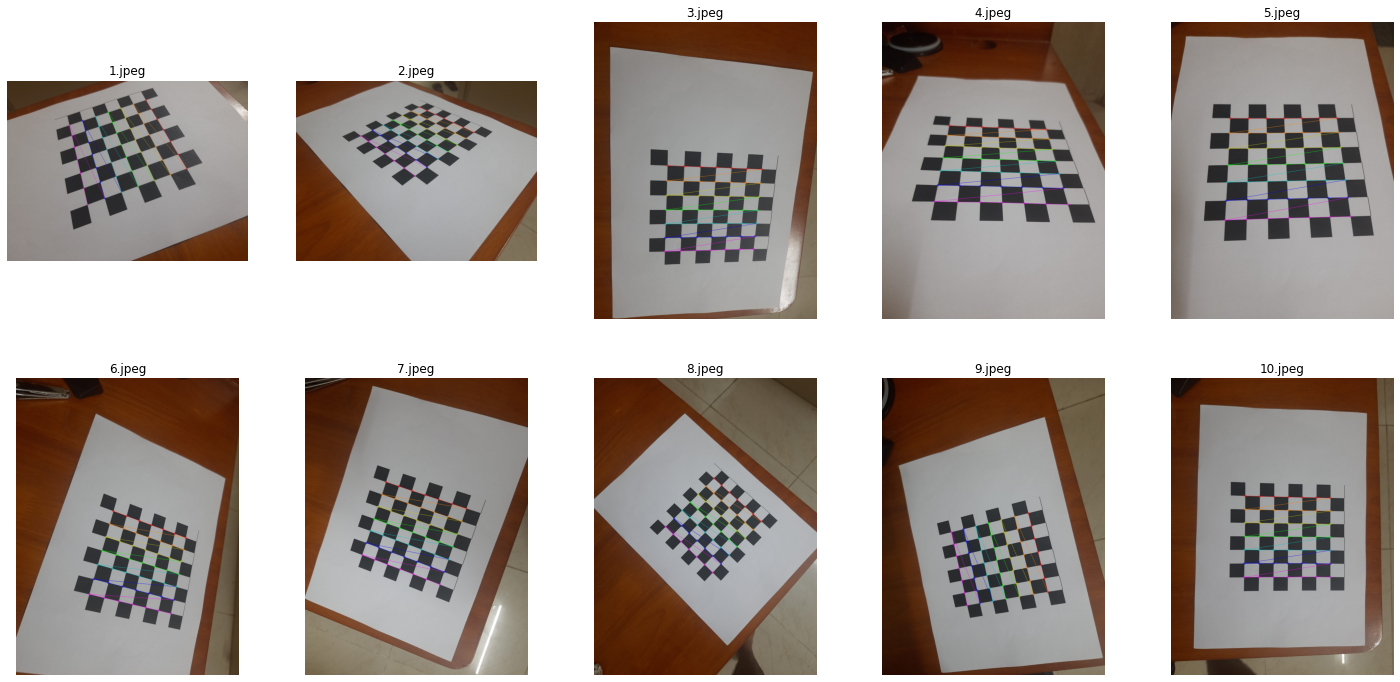

In [ ]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpeg')

# Sorting images according to the number
images.sort(key = lambda x: int(x.split('.')[0]))

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, ax = plt.subplots(2,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(fname)

#### 3) Use the function cv.calibrateCamera to calibrate your camera using your correspondences. Add the intrinsic camera matrix and the lens distortion parameters to your solution document. Format floats using printf(”%.4f”).

In [ ]:
# Camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Rounding off the elements of the matrix and distortion coefficients upto 4 decimals
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("The intrinsic camera matrix is given by:\n", mtx)
print("The lens distortion parameters is given by:\n", dist)

The intrinsic camera matrix is given by:
 [[1432.5475    0.      594.4417]
 [   0.     1403.7259  771.0387]
 [   0.        0.        1.    ]]
The lens distortion parameters is given by:
 [[ 0.3015 -3.0985  0.0133 -0.0233  5.4632]]


#### 4) Calculate the reprojection error.

In [ ]:
# Re-Projection Error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error: {}".format(mean_error/len(objpoints)))

total error: 0.44629109000498896


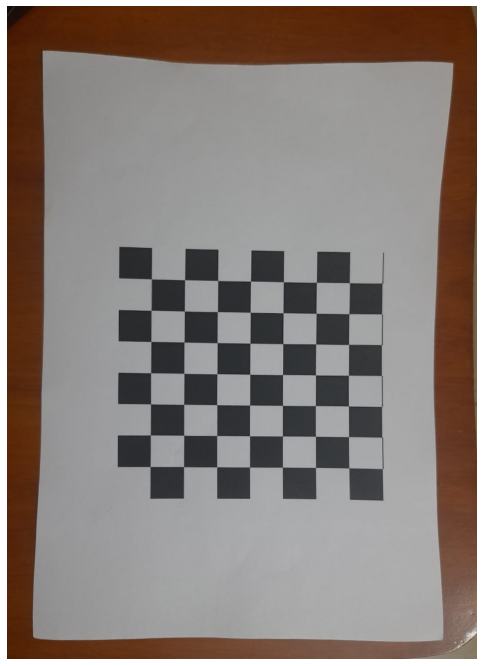

In [ ]:
# Undistorted Image
img = cv2.imread(images[-1])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

#### 5) Repeat the calibration process using the dot grid pattern. For this pattern, you will have to calculate and use the centroids of the dots as the ‘object points’ and ‘image points’.

In [ ]:
!rm *.jpeg
!gdown --id 1surn_3ecG67bpvkE9QzcuupYH3DUAjUH
!unzip Dotgrid_images.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1surn_3ecG67bpvkE9QzcuupYH3DUAjUH
To: /content/Dotgrid_images.zip
100% 505k/505k [00:00<00:00, 77.0MB/s]
Archive:  Dotgrid_images.zip
  inflating: 1.jpeg                  
  inflating: 10.jpeg                 
  inflating: 2.jpeg                  
  inflating: 3.jpeg                  
  inflating: 4.jpeg                  
  inflating: 5.jpeg                  
  inflating: 6.jpeg                  
  inflating: 7.jpeg                  
  inflating: 8.jpeg                  
  inflating: 9.jpeg                  


In [ ]:
# Setting up Blob Detector for the circles

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 0
blobParams.maxThreshold = 200

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 30

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.1

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01
blobParams.minDistBetweenBlobs = 2 # Since the distance between the centres of the blobs is 2.2cm

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

# Preparing object points
objp = np.zeros((10*10,3), np.float32)
objp[:,:2] = np.mgrid[0:220:22,0:220:22].T.reshape(-1,2)

print('Object Points:\n', objp)

Object Points:
 [[  0.   0.   0.]
 [ 22.   0.   0.]
 [ 44.   0.   0.]
 [ 66.   0.   0.]
 [ 88.   0.   0.]
 [110.   0.   0.]
 [132.   0.   0.]
 [154.   0.   0.]
 [176.   0.   0.]
 [198.   0.   0.]
 [  0.  22.   0.]
 [ 22.  22.   0.]
 [ 44.  22.   0.]
 [ 66.  22.   0.]
 [ 88.  22.   0.]
 [110.  22.   0.]
 [132.  22.   0.]
 [154.  22.   0.]
 [176.  22.   0.]
 [198.  22.   0.]
 [  0.  44.   0.]
 [ 22.  44.   0.]
 [ 44.  44.   0.]
 [ 66.  44.   0.]
 [ 88.  44.   0.]
 [110.  44.   0.]
 [132.  44.   0.]
 [154.  44.   0.]
 [176.  44.   0.]
 [198.  44.   0.]
 [  0.  66.   0.]
 [ 22.  66.   0.]
 [ 44.  66.   0.]
 [ 66.  66.   0.]
 [ 88.  66.   0.]
 [110.  66.   0.]
 [132.  66.   0.]
 [154.  66.   0.]
 [176.  66.   0.]
 [198.  66.   0.]
 [  0.  88.   0.]
 [ 22.  88.   0.]
 [ 44.  88.   0.]
 [ 66.  88.   0.]
 [ 88.  88.   0.]
 [110.  88.   0.]
 [132.  88.   0.]
 [154.  88.   0.]
 [176.  88.   0.]
 [198.  88.   0.]
 [  0. 110.   0.]
 [ 22. 110.   0.]
 [ 44. 110.   0.]
 [ 66. 110.   0.]
 [ 88. 110. 

Number of images retained during blob detection: 8


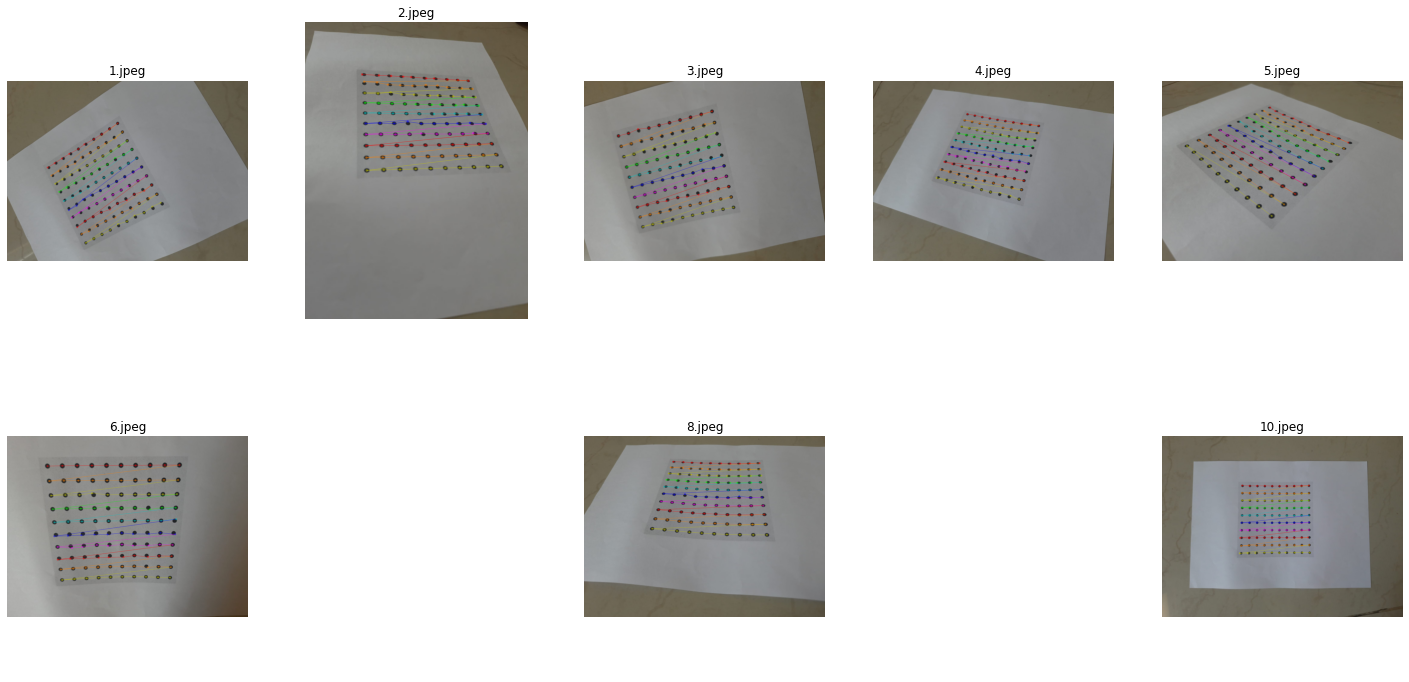

In [ ]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpeg')
# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Counter for images where corners were detected
c = 0

fig, ax = plt.subplots(2,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame by frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detecting blobs
    keypoints = blobDetector.detect(img)
    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None,
                                      blobDetector = blobDetector)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners,
                                    (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(fname)

        c += 1

print('Number of images retained during blob detection:',c)

In [ ]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, im_with_keypoints_gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("The intrinsic camera matrix is given by:\n", mtx)
print("The lens distortion parameters is given by:\n", dist)

The intrinsic camera matrix is given by:
 [[1438.5471    0.      777.5224]
 [   0.     1461.0935  484.8565]
 [   0.        0.        1.    ]]
The lens distortion parameters is given by:
 [[-0.0172  0.087  -0.0334 -0.0035  0.1077]]


In [ ]:
# Re-Projection Error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error: {}".format(mean_error/len(objpoints)))

total error: 0.6402279812395856


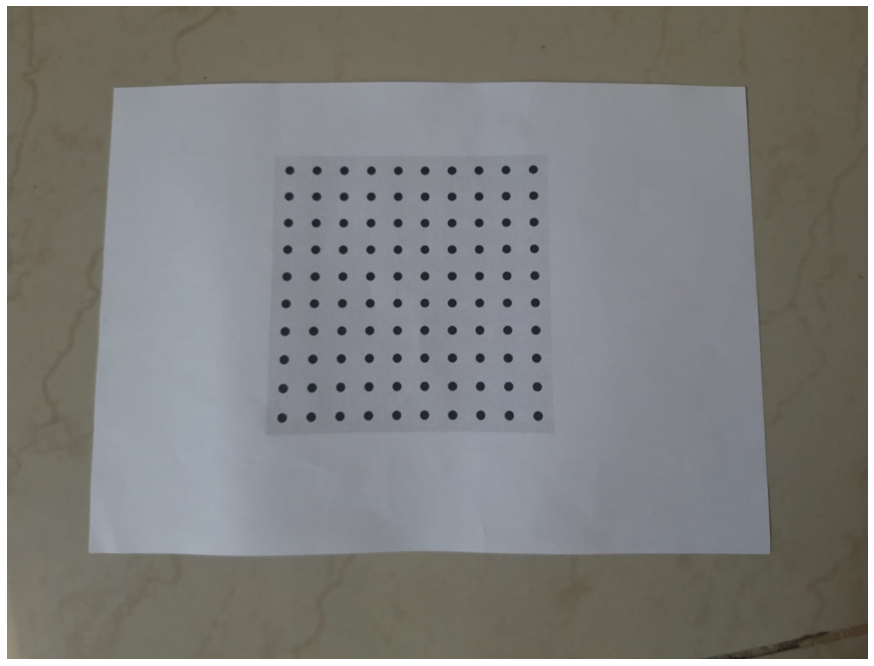

In [ ]:
# Undistorted Image
img = cv2.imread(images[-1])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))